8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

In [122]:
#library("ISLR2")
#library("MASS")
library("ggplot2")
library("ggthemes")
#library("boot")
#library("skimr")
#library("caret")
library("leaps")
library("glmnet")
library("pls")
library("patchwork")

# Define a color cycle to use
colors <- colorblind_pal()(8)


(a) Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

In [123]:
set.seed(123)
X <- rnorm(100)
epsilon <- rnorm(100, sd = 0.25)

(b) Generate a response vector $y$ of length $n = 100$ according to the model:

$y = \beta_0 + \beta_ X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$.

We choose the following constants as follow:

$\beta_0 = 1.0, \beta_1 = 1.5, \beta_2 = 0.5, \beta_3 = -0.25$

In [124]:
betas <- c(-1.0, 1.5, 0.5, -0.5)

In [125]:
y <- betas[1] + betas[2] * X + betas[3] * X^2 + betas[4] * X^3 + epsilon

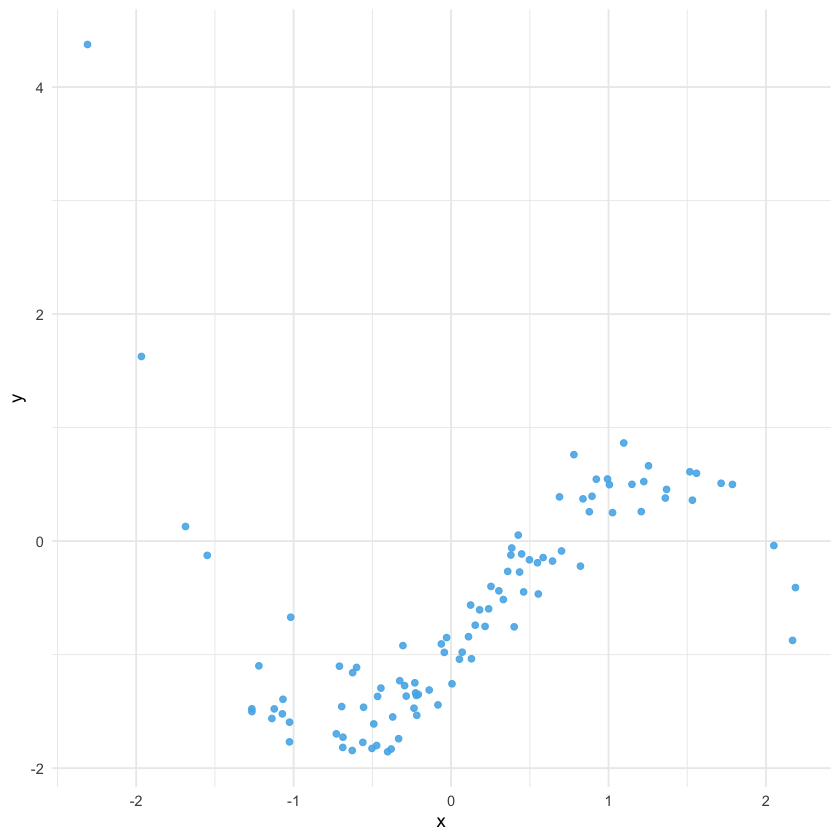

In [126]:
ggplot(data.frame(x = X, y = y), aes(x, y)) +
    geom_point(aes(x, y), color = colors[3], alpha = 0.9) +
    theme_minimal()

(c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2, \ldots, X^{10}$. 
What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? 
Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained.
Note you will need to use the `data.frame()` function to create a single data set containing both `X` and `y`.

In [127]:
X2 <- matrix(rep(X, 10), ncol = 10)
for (i in seq(10)) {
    X2[, i] <- X2[, i]^i
}

In [128]:
Xy <- data.frame(X = X2, y = y)
head(Xy)

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.56047565,0.314132950,-0.1760638685,9.867951e-02,-5.530746e-02,3.099849e-02,-1.737390e-02,9.737646e-03,-5.457713e-03,3.058915e-03,-1.7732167
2,-0.23017749,0.052981677,-0.0121951893,2.807058e-03,-6.461216e-04,1.487226e-04,-3.423260e-05,7.879575e-06,-1.813701e-06,4.174731e-07,-1.2484569
3,1.55870831,2.429571609,3.7869934661,5.902818e+00,9.200772e+00,1.434132e+01,2.235393e+01,3.484326e+01,5.431048e+01,8.465420e+01,0.5976786
4,0.07050839,0.004971433,0.0003505278,2.471515e-05,1.742625e-06,1.228697e-07,8.663346e-09,6.108386e-10,4.306925e-11,3.036743e-12,-0.9788126
5,0.12928774,0.016715318,0.0021610857,2.794019e-04,3.612324e-05,4.670291e-06,6.038114e-07,7.806541e-08,1.009290e-08,1.304888e-09,-1.0366959
6,1.71506499,2.941447909,5.0447743199,8.652116e+00,1.483894e+01,2.544975e+01,4.364797e+01,7.485911e+01,1.283882e+02,2.201942e+02,0.5096773


In [129]:
names(Xy)

[1] "X.1"  "X.2"  "X.3"  "X.4"  "X.5"  "X.6"  "X.7"  "X.8"  "X.9"  "X.10"
[11] "y"

In [130]:
reg_fit_full <- regsubsets(y ~ ., Xy, nvmax = 10)
reg_summary <- summary(reg_fit_full)
names(reg_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [131]:
data.frame(row.names = seq(10), reg_summary[c("cp", "bic", "adjr2")])

,cp,bic,adjr2
,<dbl>,<dbl>,<dbl>
1,983.484668,-26.77999,0.2951364
2,458.385612,-89.17409,0.6355942
3,2.184588,-261.46790,0.9372197
4,2.928712,-258.20512,0.9374048
5,4.692240,-253.85474,0.9368999
6,5.738081,-250.28429,0.9368779
7,5.628948,-248.00504,0.9376588
8,7.565386,-243.47081,0.9370184
9,9.022299,-239.47385,0.9367048


In [132]:
idx <- c(
    which.min(reg_summary$cp),
    which.min(reg_summary$bic),
    which.max(reg_summary$adjr2)
)

data.frame(
    row.names = c("cp", "bic", "adjr2"),
    model = idx,
    value = c(
        reg_summary$cp[idx[1]],
        reg_summary$bic[idx[2]],
        reg_summary$adjr2[idx[3]]
    )
)


,model,value
,<int>,<dbl>
cp,3,2.1845883
bic,3,-261.4679012
adjr2,7,0.9376588


The best models are listed above: for $C_p$ and BIC is model 3, while for adj $R^2$ is model 7.
This seems reasonable for the adj $R^2$ as it is supposed to increase with the number of predictors included in the model.
However, the $C_p$ and the BIC criteria correctly selected model 3 with the first three predictors.

In [133]:
reg_summary$outmat

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
1 ( 1 ),,*,,,,,,,,
2 ( 1 ),*,,,,*,,,,,
3 ( 1 ),*,*,*,,,,,,,
4 ( 1 ),*,*,*,,,*,,,,
5 ( 1 ),*,*,*,,,,*,,*,
6 ( 1 ),*,*,*,*,,*,,*,,
7 ( 1 ),*,*,*,*,,*,,*,,*
8 ( 1 ),*,*,*,*,*,*,,*,,*
9 ( 1 ),*,*,*,*,*,*,*,*,,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


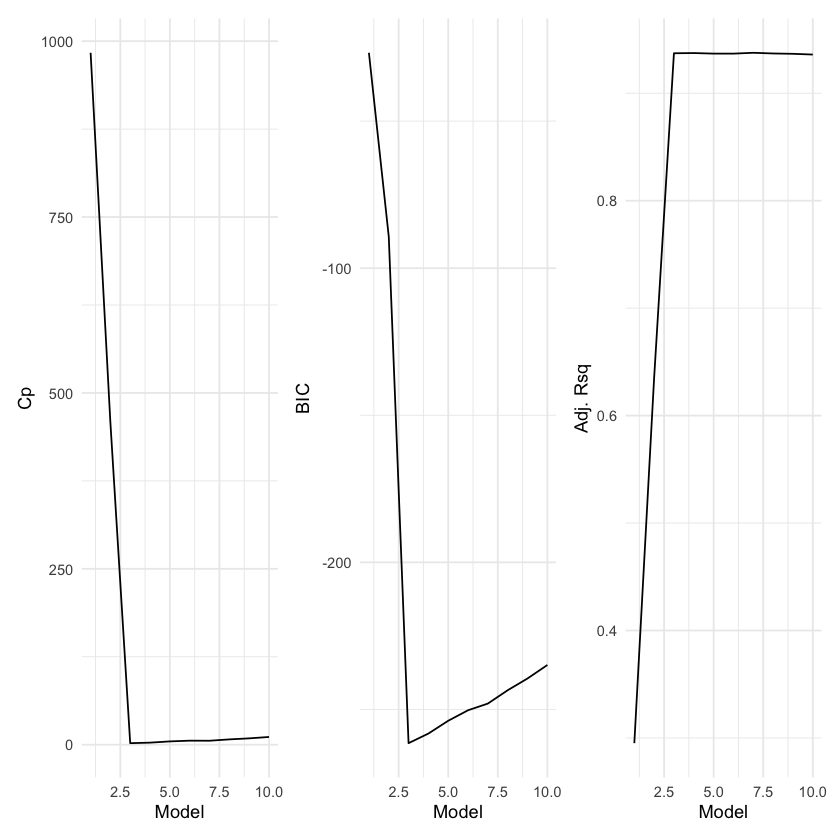

In [134]:
df_res <- data.frame(
        model = seq(10),
        cp = reg_summary$cp,
        bic = reg_summary$bic,
        adjr2 = reg_summary$adjr2
        )

p1 <- ggplot(df_res, aes(x = model, y = cp)) +
        geom_line() +
        xlab("Model") +
        ylab("Cp") + theme_minimal()
p2 <- ggplot(df_res, aes(x = model, y = bic)) +
        geom_line() +
        xlab("Model") +
        ylab("BIC") + theme_minimal()
p3 <- ggplot(df_res, aes(x = model, y = adjr2)) +
        geom_line() +
        xlab("Model") +
        ylab("Adj. Rsq") + theme_minimal()

p1 + p2 + p3

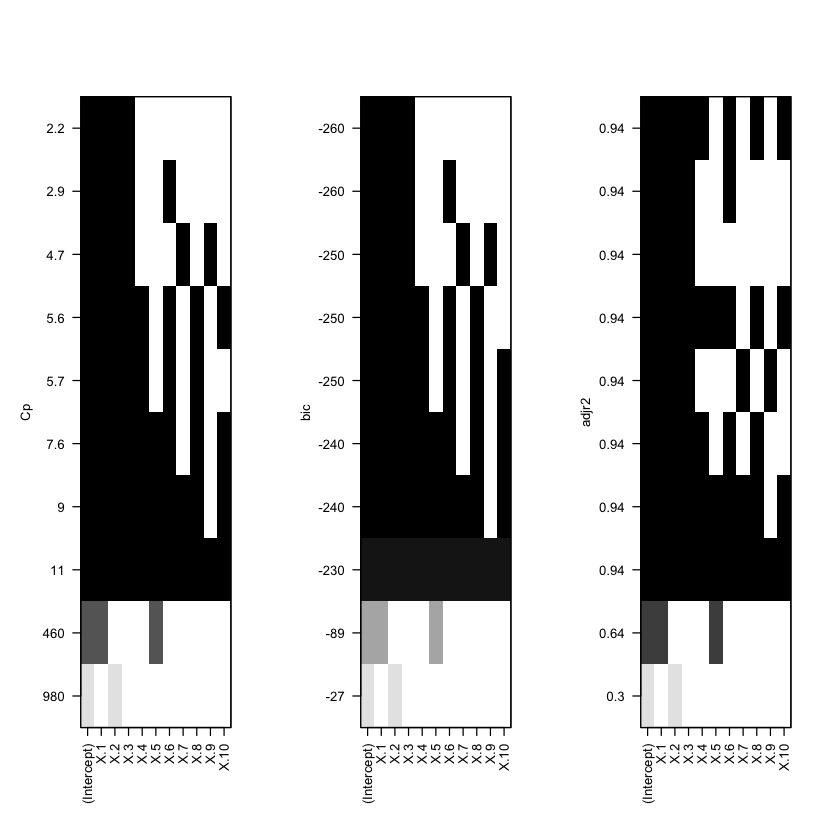

In [135]:
par(mfrow = c(1, 3))
plot(reg_fit_full, scale = "Cp")
plot(reg_fit_full, scale = "bic")
plot(reg_fit_full, scale = "adjr2")


In [136]:
print(coef(reg_fit_full, 3))
print(coef(reg_fit_full, 7))


(Intercept)         X.1         X.2         X.3 
 -1.0074015   1.4801116   0.4771142  -0.4948909 
(Intercept)         X.1         X.2         X.3         X.4         X.6 
-1.05170626  1.47268710  1.06897120 -0.48673716 -1.00608524  0.55345943 
        X.8        X.10 
-0.12176797  0.00933845 


(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. 
How does your answer compare to the results in (c)?

In [137]:
reg_fit_fwd <- regsubsets(
    y ~ ., Xy,
    nvmax = 10,
    method = "forward"
)

reg_fwd_summary <- summary(reg_fit_fwd)

In [138]:
idx <- c(
    which.min(reg_fwd_summary$cp),
    which.min(reg_fwd_summary$bic),
    which.max(reg_fwd_summary$adjr2)
)

data.frame(
    row.names = c("cp", "bic", "adjr2"),
    model = idx,
    value = c(
        reg_fwd_summary$cp[idx[1]],
        reg_fwd_summary$bic[idx[2]],
        reg_fwd_summary$adjr2[idx[3]]
    )
)


,model,value
,<int>,<dbl>
cp,4,3.9356111
bic,4,-257.1274313
adjr2,5,0.9368999


In [139]:
reg_fwd_summary$outmat

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
1 ( 1 ),,*,,,,,,,,
2 ( 1 ),,*,,,,,,,*,
3 ( 1 ),*,*,,,,,,,*,
4 ( 1 ),*,*,*,,,,,,*,
5 ( 1 ),*,*,*,,,,*,,*,
6 ( 1 ),*,*,*,,,*,*,,*,
7 ( 1 ),*,*,*,,,*,*,,*,*
8 ( 1 ),*,*,*,*,,*,*,,*,*
9 ( 1 ),*,*,*,*,,*,*,*,*,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


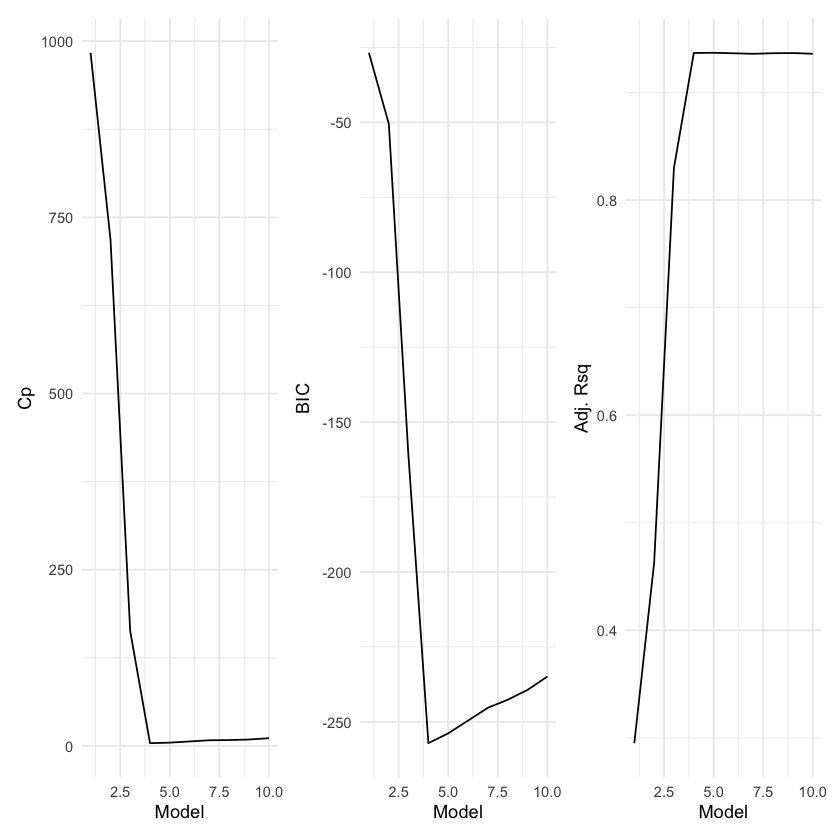

In [140]:
df_res <- data.frame(
    model = seq(10),
    cp = reg_fwd_summary$cp,
    bic = reg_fwd_summary$bic,
    adjr2 = reg_fwd_summary$adjr2
)

p1 <- ggplot(df_res, aes(x = model, y = cp)) +
    geom_line() +
    xlab("Model") +
    ylab("Cp") +
    theme_minimal()
p2 <- ggplot(df_res, aes(x = model, y = bic)) +
    geom_line() +
    xlab("Model") +
    ylab("BIC") +
    theme_minimal()
p3 <- ggplot(df_res, aes(x = model, y = adjr2)) +
    geom_line() +
    xlab("Model") +
    ylab("Adj. Rsq") +
    theme_minimal()

p1 + p2 + p3

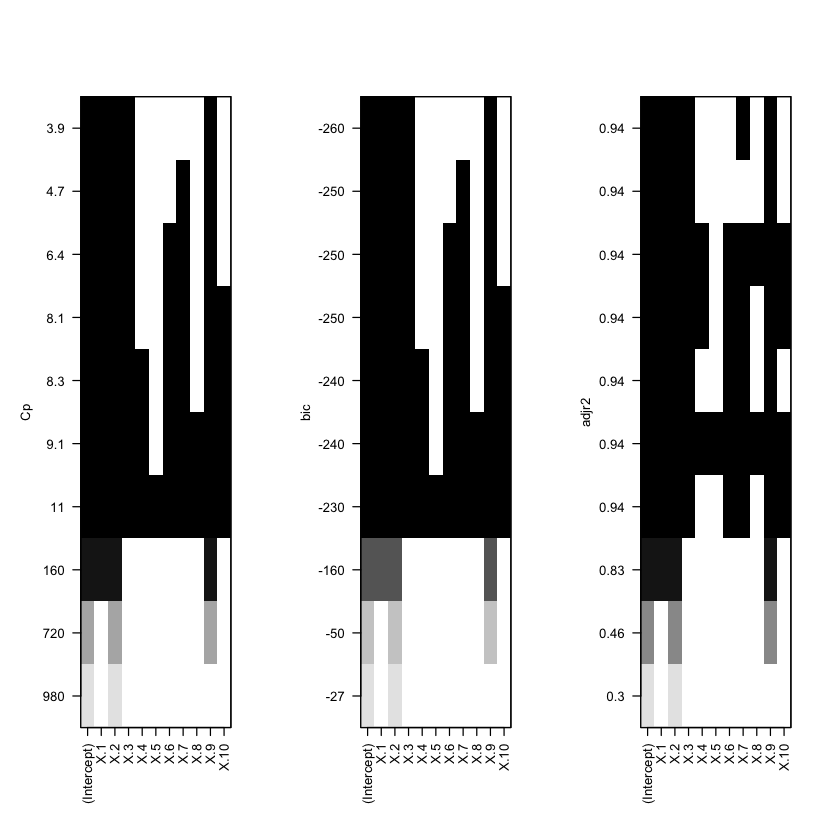

In [141]:
par(mfrow = c(1, 3))
plot(reg_fit_fwd, scale = "Cp")
plot(reg_fit_fwd, scale = "bic")
plot(reg_fit_fwd, scale = "adjr2")


In [142]:
print(coef(reg_fit_fwd, 4))
print(coef(reg_fit_fwd, 5))

  (Intercept)           X.1           X.2           X.3           X.9 
-1.0063913477  1.4597122679  0.4739765717 -0.4780840526 -0.0001257994 
 (Intercept)          X.1          X.2          X.3          X.7          X.9 
-0.999994638  1.524155356  0.464387551 -0.562706465  0.013965790 -0.002339105 


The forward stepwise selection bring the selected model between the criteria closer, but increased the number of predictors selected as best: 4 for $C_p$ and BIC and 5 for the adj. $R^2$. 

,model,value
,<int>,<dbl>
cp,3,2.1845883
bic,3,-261.4679012
adjr2,7,0.9376588


,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
1 ( 1 ),*,,,,,,,,,
2 ( 1 ),*,,*,,,,,,,
3 ( 1 ),*,*,*,,,,,,,
4 ( 1 ),*,*,*,,,*,,,,
5 ( 1 ),*,*,*,*,,*,,,,
6 ( 1 ),*,*,*,*,,*,,*,,
7 ( 1 ),*,*,*,*,,*,,*,,*
8 ( 1 ),*,*,*,*,*,*,,*,,*
9 ( 1 ),*,*,*,*,*,*,*,*,,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


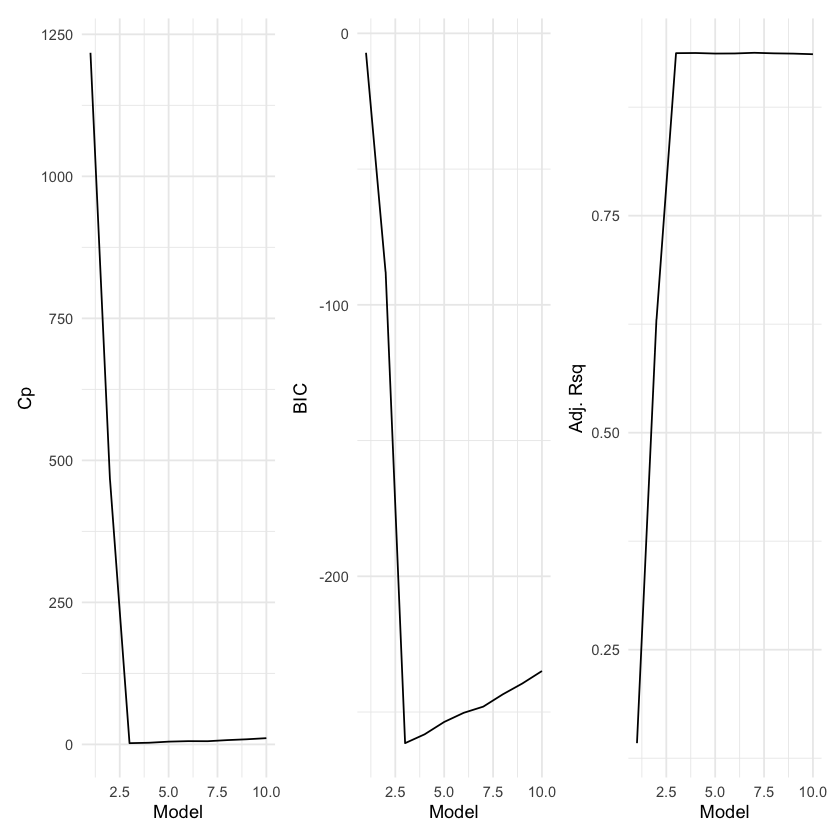

In [143]:
reg_fit_bwd <- regsubsets(
    y ~ ., Xy,
    nvmax = 10,
    method = "backward"
)

reg_bwd_summary <- summary(reg_fit_bwd)

idx <- c(
    which.min(reg_bwd_summary$cp),
    which.min(reg_bwd_summary$bic),
    which.max(reg_bwd_summary$adjr2)
)

data.frame(
    row.names = c("cp", "bic", "adjr2"),
    model = idx,
    value = c(
        reg_bwd_summary$cp[idx[1]],
        reg_bwd_summary$bic[idx[2]],
        reg_bwd_summary$adjr2[idx[3]]
    )
)

df_res <- data.frame(
    model = seq(10),
    cp = reg_bwd_summary$cp,
    bic = reg_bwd_summary$bic,
    adjr2 = reg_bwd_summary$adjr2
)

p1 <- ggplot(df_res, aes(x = model, y = cp)) +
    geom_line() +
    xlab("Model") +
    ylab("Cp") +
    theme_minimal()
p2 <- ggplot(df_res, aes(x = model, y = bic)) +
    geom_line() +
    xlab("Model") +
    ylab("BIC") +
    theme_minimal()
p3 <- ggplot(df_res, aes(x = model, y = adjr2)) +
    geom_line() +
    xlab("Model") +
    ylab("Adj. Rsq") +
    theme_minimal()

p1 + p2 + p3

reg_bwd_summary$outmat

The backward selection give the same result as the best selection procedure.

(e) Now fit a lasso model to the simulated data, again using $X, X^2, \ldots, X^{10}$ as predictors. 
Use cross-validation to select the optimal value of $\lambda$. 
Create plots of the cross-validation error as a function of $\lambda$. 
Report the resulting coefficient estimates, and discuss the results obtained.

In [144]:
dim(Xy)

[1] 100  11

In [145]:
lambda_grid <- 10^seq(10, -2, length = 100)

lasso_fit <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1,
    lambda = lambda_grid
)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


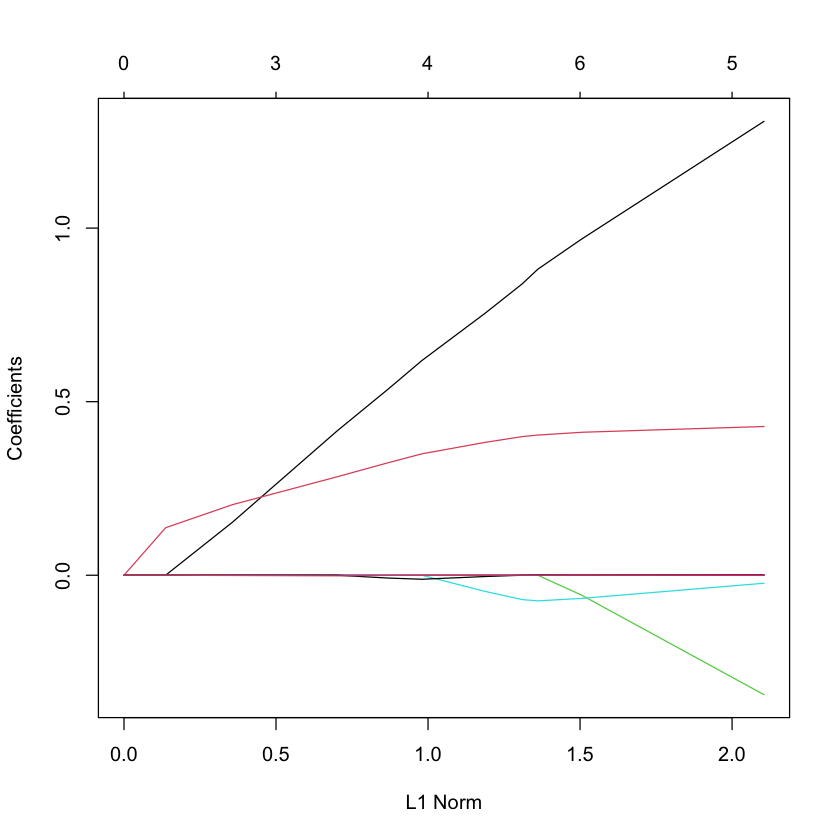

In [146]:
plot(lasso_fit)

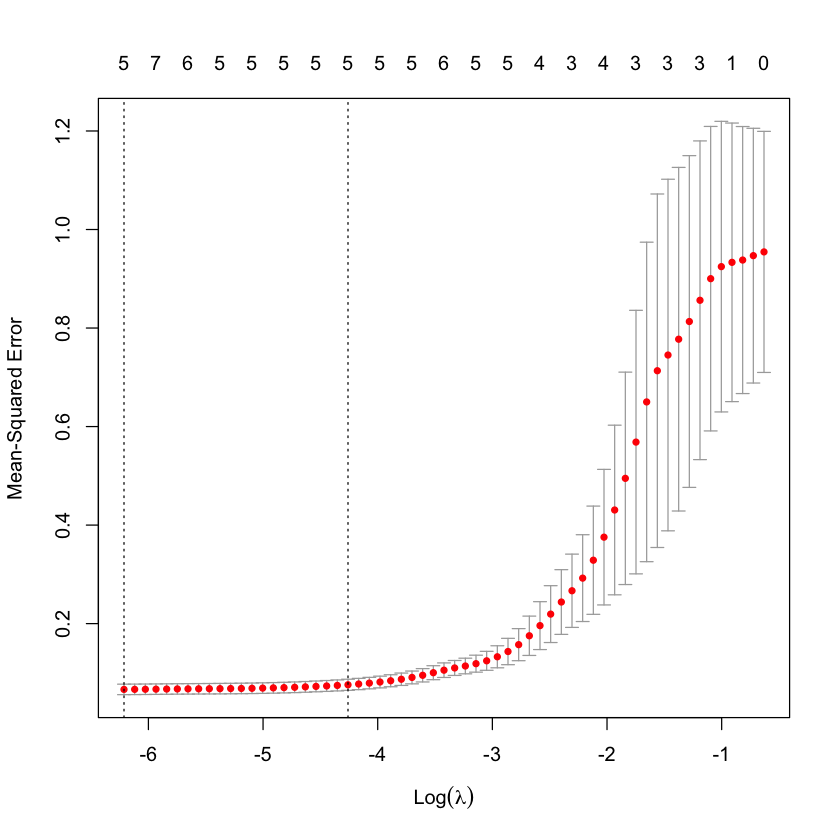

In [147]:
set.seed(1)
lasso_cv <- cv.glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1)
plot(lasso_cv)

best_lambda <- lasso_cv$lambda.min

In [160]:
best_lambda

[1] 0.002003554

In [148]:
out <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1,
    lambda = best_lambda
)
lasso_coef <- predict(out, type = "coefficients", s = best_lambda)[1:10, ]
print(lasso_coef)

  (Intercept)           X.1           X.2           X.3           X.4 
-0.9892048693  1.4453747249  0.4357567422 -0.4705213263  0.0000000000 
          X.5           X.6           X.7           X.8           X.9 
 0.0000000000  0.0020395029  0.0000000000  0.0000000000 -0.0001401529 


In [149]:
out <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1
)
lasso_coef <- predict(out, type = "coefficients", s = best_lambda)[1:10, ]
print(lasso_coef)

  (Intercept)           X.1           X.2           X.3           X.4 
-0.9892676094  1.4470887397  0.4359062072 -0.4716566444  0.0000000000 
          X.5           X.6           X.7           X.8           X.9 
 0.0000000000  0.0020441461  0.0000000000  0.0000000000 -0.0001334811 


A few things from the lasso fit:

- The optimal $\lambda$ seems quite small, so it is questionable to use lasso instead of regular least square.
- The lasso model give as the best model with the optimal $\lambda = 0.002$, the non-zero coefficients 1, 2, 3, 6 and 9. Althought the last two are fairly small.

(f) Now generate a response vector $y$ according to the model $y = \beta_0 + \beta_7 X_7 + \epsilon$, and perform best subset selection and the lasso. Discuss the results obtained.

In [161]:
y <- - 1.0 + 0.5 * X^7 + epsilon * 10

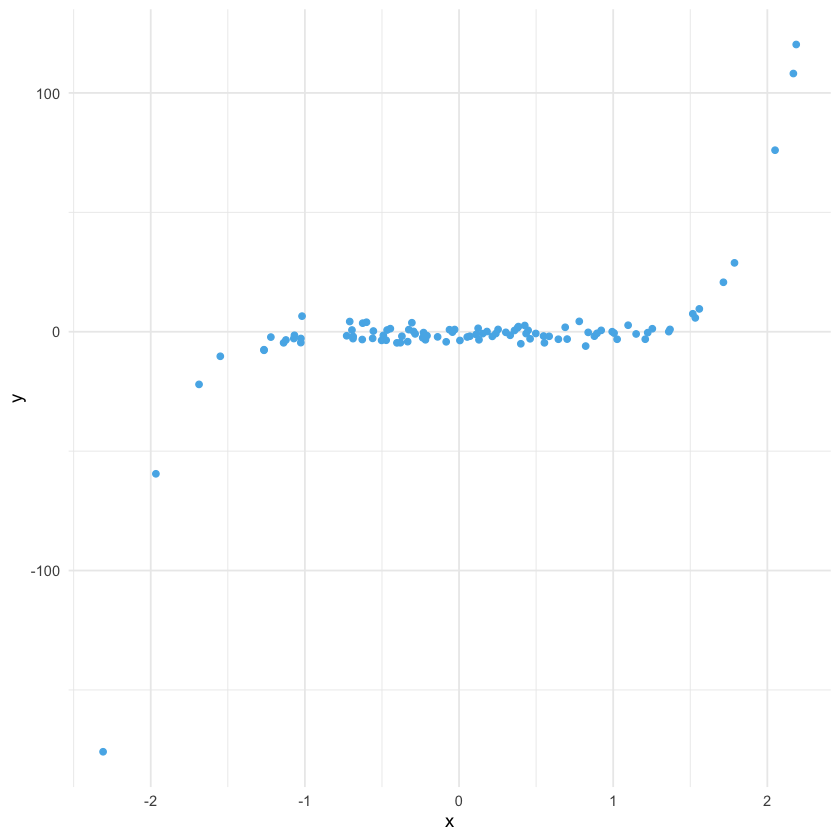

In [162]:
ggplot(data.frame(x = X, y = y), aes(x, y)) +
    geom_point(color = colors[3]) + theme_minimal()

In [163]:
Xy <- data.frame(X = X2, y = y)

In [164]:
head(Xy)

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.56047565,0.314132950,-0.1760638685,9.867951e-02,-5.530746e-02,3.099849e-02,-1.737390e-02,9.737646e-03,-5.457713e-03,3.058915e-03,-2.7847034
2,-0.23017749,0.052981677,-0.0121951893,2.807058e-03,-6.461216e-04,1.487226e-04,-3.423260e-05,7.879575e-06,-1.813701e-06,4.174731e-07,-0.3578078
3,1.55870831,2.429571609,3.7869934661,5.902818e+00,9.200772e+00,1.434132e+01,2.235393e+01,3.484326e+01,5.431048e+01,8.465420e+01,9.5602373
4,0.07050839,0.004971433,0.0003505278,2.471515e-05,1.742625e-06,1.228697e-07,8.663346e-09,6.108386e-10,4.306925e-11,3.036743e-12,-1.8688565
5,0.12928774,0.016715318,0.0021610857,2.794019e-04,3.612324e-05,4.670291e-06,6.038114e-07,7.806541e-08,1.009290e-08,1.304888e-09,-3.3790461
6,1.71506499,2.941447909,5.0447743199,8.652116e+00,1.483894e+01,2.544975e+01,4.364797e+01,7.485911e+01,1.283882e+02,2.201942e+02,20.7114165


In [165]:
reg_fit_full <- regsubsets(y ~ ., Xy, nvmax = 10)
reg_summary <- summary(reg_fit_full)

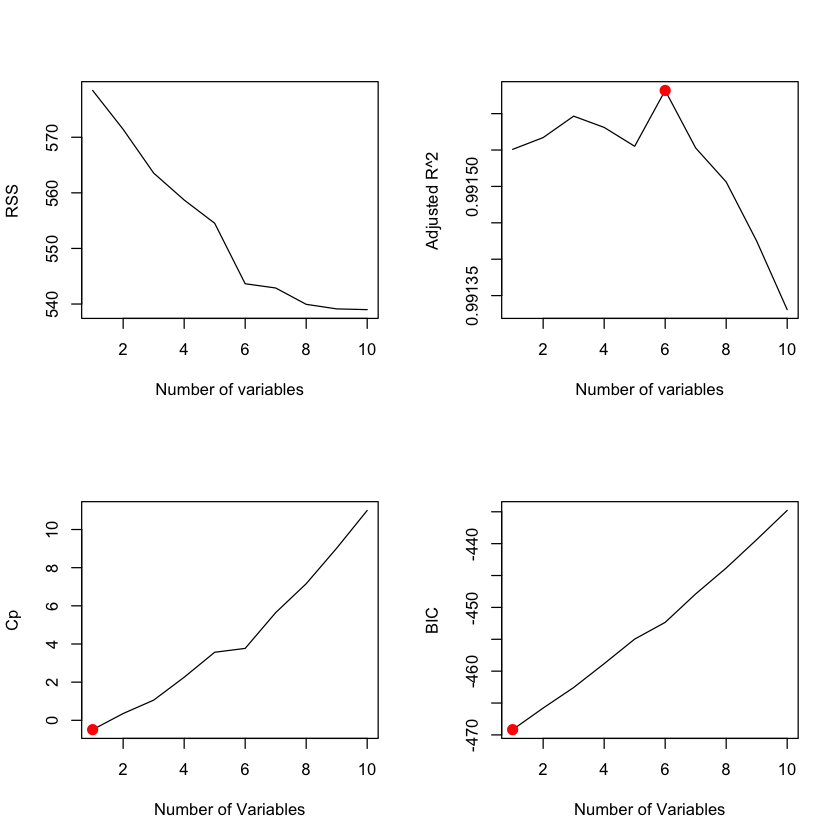

In [166]:
par(mfrow = c(2, 2))
plot(
    reg_summary$rss,
    xlab = "Number of variables",
    ylab = "RSS",
    type = "l",
)
plot(
    reg_summary$adjr2,
    xlab = "Number of variables",
    ylab = "Adjusted R^2",
    type = "l",
)

a <- which.max(reg_summary$adjr2)

points(a, reg_summary$adjr2[a],
    col = "red", cex = 2,
    pch = 20
)

plot(
    reg_summary$cp,
    xlab = "Number of Variables",
    ylab = "Cp",
    type = "l"
)

b <- which.min(reg_summary$cp)

points(b, reg_summary$cp[b],
    col = "red", cex = 2, pch = 20
)

c <- which.min(reg_summary$bic)

plot(
    reg_summary$bic,
    xlab = "Number of Variables",
    ylab = "BIC", type = "l"
)

points(c, reg_summary$bic[c],
    col = "red", cex = 2, pch = 20
)

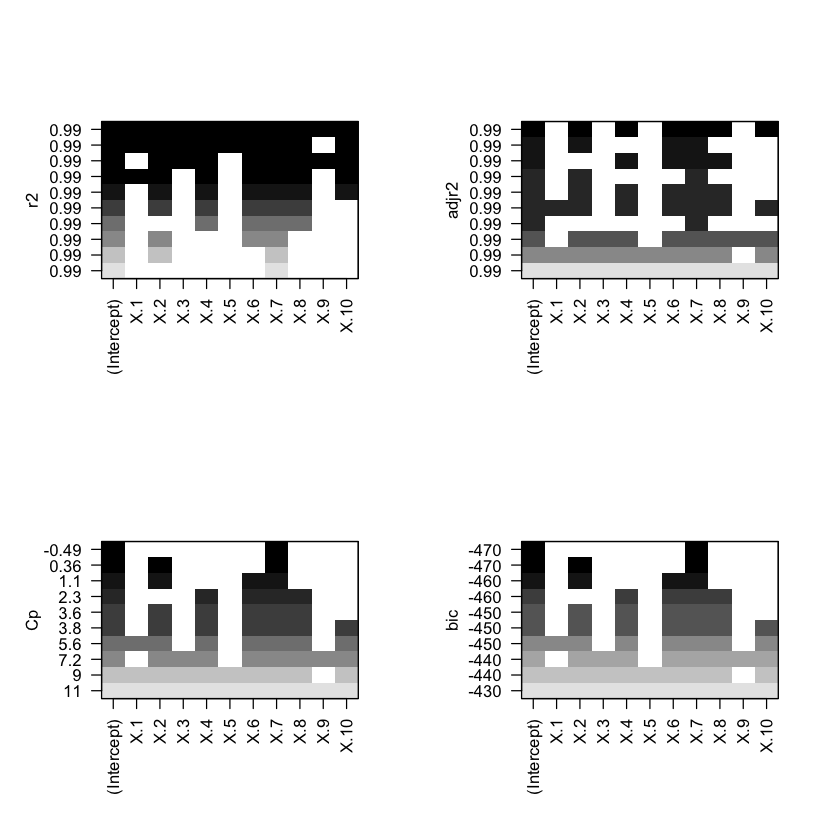

In [167]:
par(mfrow = c(2, 2), mar = c(0.5, 0.5, 0.5, 0.5))
plot(reg_fit_full, scale = "r2")
plot(reg_fit_full, scale = "adjr2")
plot(reg_fit_full, scale = "Cp")
plot(reg_fit_full, scale = "bic")

In [168]:
reg_summary$outmat

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
1 ( 1 ),,,,,,,*,,,
2 ( 1 ),,*,,,,,*,,,
3 ( 1 ),,*,,,,*,*,,,
4 ( 1 ),,,,*,,*,*,*,,
5 ( 1 ),,*,,*,,*,*,*,,
6 ( 1 ),,*,,*,,*,*,*,,*
7 ( 1 ),*,*,,*,,*,*,*,,*
8 ( 1 ),,*,*,*,,*,*,*,*,*
9 ( 1 ),*,*,*,*,*,*,*,*,,*
10 ( 1 ),*,*,*,*,*,*,*,*,*,*


In [169]:
idx <- c(
    which.min(reg_summary$cp),
    which.min(reg_summary$bic),
    which.max(reg_summary$adjr2)
)

data.frame(
    row.names = c("cp", "bic", "adjr2"),
    model = idx,
    value = c(
        reg_summary$cp[idx[1]],
        reg_summary$bic[idx[2]],
        reg_summary$adjr2[idx[3]]
    )
)


,model,value
,<int>,<dbl>
cp,1,-0.4892301
bic,1,-469.1747544
adjr2,6,0.9916319


In [170]:
print(coef(reg_fit_full, 1))

(Intercept)         X.7 
 -1.2668720   0.4992612 


In [177]:
lambda_grid <- 10^seq(10, -2, length = 200)

lasso_fit <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1,
    lambda = lambda_grid
)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


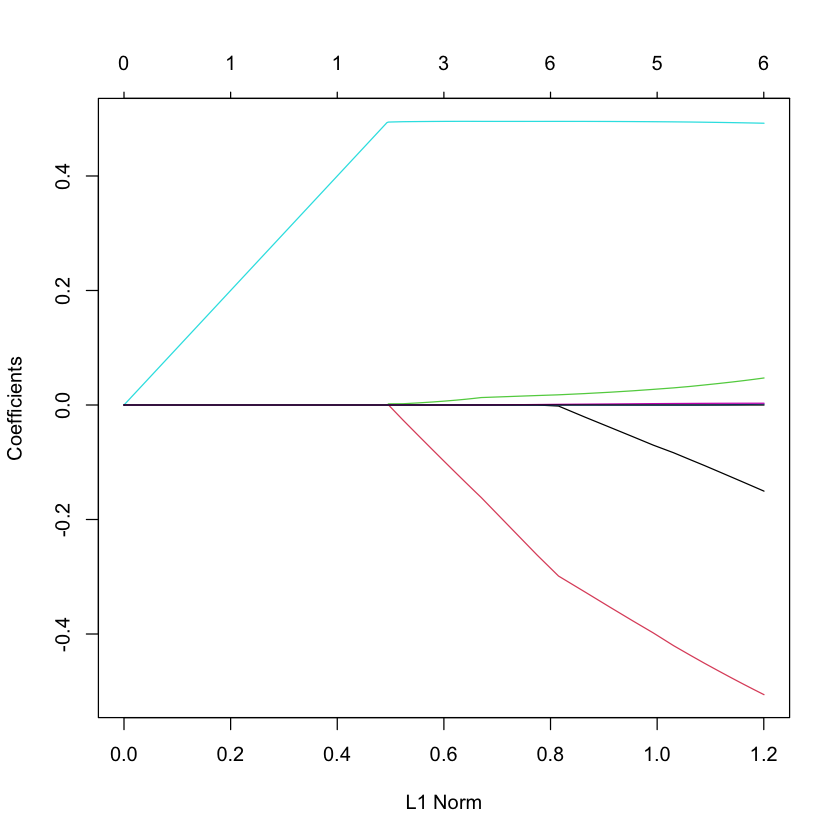

In [178]:
plot(lasso_fit)

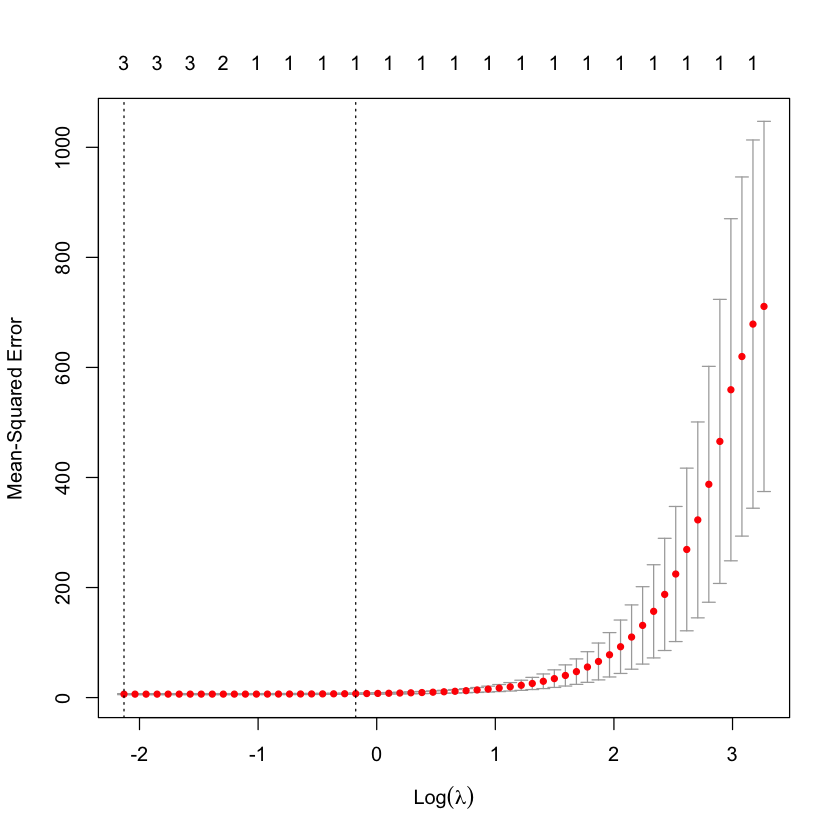

In [179]:
set.seed(1)
lasso_cv <- cv.glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1
)
plot(lasso_cv)

best_lambda <- lasso_cv$lambda.min

In [180]:
best_lambda

[1] 0.1187582

In [181]:
out <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1,
    lambda = best_lambda
)
lasso_coef <- predict(out, type = "coefficients", s = best_lambda)[1:10, ]
print(lasso_coef)

(Intercept)         X.1         X.2         X.3         X.4         X.5 
-1.15768251  0.00000000 -0.13627459  0.00000000  0.00000000  0.03611007 
        X.6         X.7         X.8         X.9 
 0.00000000  0.48975388  0.00000000  0.00000000 


In [182]:
out <- glmnet(
    as.matrix(Xy[, -11]),
    as.matrix(Xy[, 11]),
    alpha = 1
)
lasso_coef <- predict(out, type = "coefficients", s = best_lambda)[1:10, ]
print(lasso_coef)

 (Intercept)          X.1          X.2          X.3          X.4          X.5 
-1.162975537  0.000000000 -0.120345425  0.000000000  0.000000000  0.006469692 
         X.6          X.7          X.8          X.9 
 0.000000000  0.495922034  0.000000000  0.000000000 
